#  Importing the Dependencies

In [1]:
# Importing necessary libraries used for data cleaning, and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Chi Square
from sklearn.feature_selection import chi2
import scipy.stats as stats

In [4]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

In [5]:
# Constant feature checking
from sklearn.feature_selection import VarianceThreshold

In [6]:
# Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [7]:
# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split
# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [8]:
# Importing Models (used for making prediction)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
# Importing metrics used for evaluation of our models
from sklearn import metrics
from sklearn.metrics import classification_report

In [9]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)

# Data Collection and Data Exploration

In [10]:
df = pd.read_csv("data.csv")

In [11]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


#  Exploring Data

In [13]:
df.shape

(195, 24)

In [14]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**Observations:**
There are no null values in our dataset

In [15]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Data Visualization

In [16]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

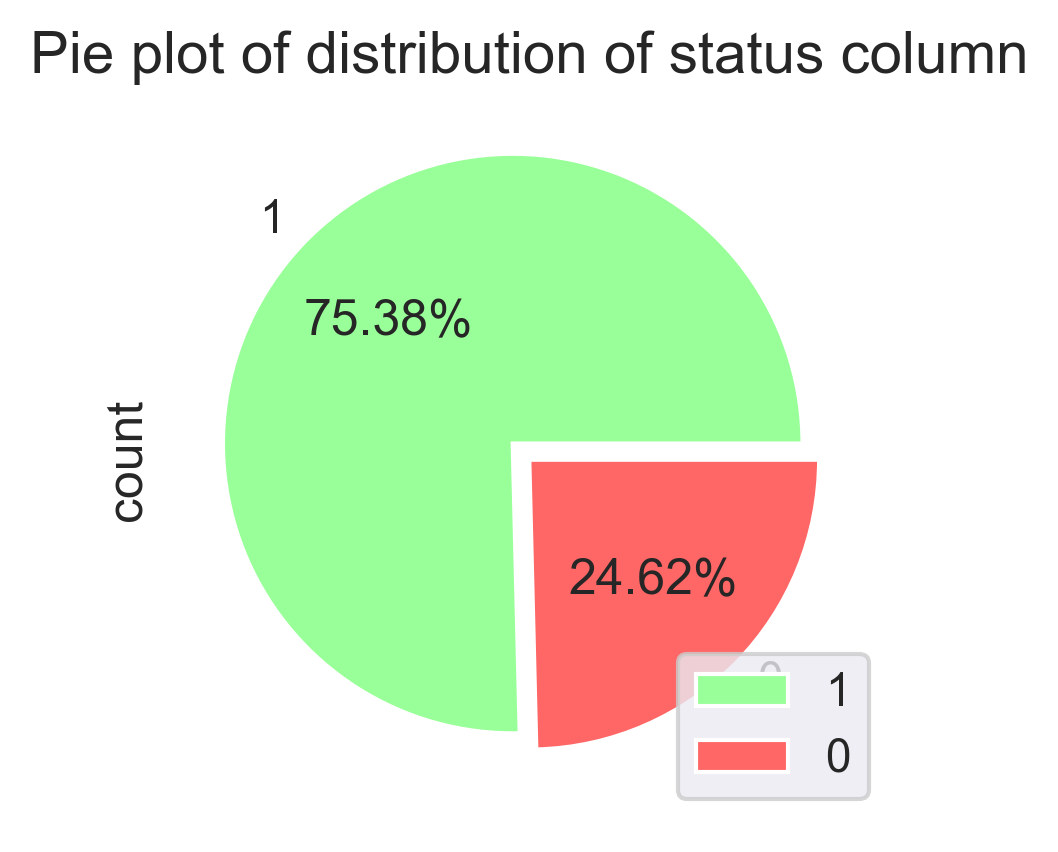

In [17]:
explode=(0.08,0)

df['status'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(3,3),explode=explode,colors=['#99ff99','#ff6666'])
plt.title("Pie plot of distribution of status column", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

**1 ---> Peoples with Parkinsons disease**

**0 ---> Healthy peoples**

**Observations:**
- 75.38% peoples (i.e. 147 peoples out of 195 peoples) are those who have parkinson disease. While 24.62% peoples (i.e. 48 peoples out of 195 peoples) are those who don't have parkinsons disease
- Data seems imbalanced

## Grouping the data based on target variable


# Feature Selection

In [18]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr("spearman")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
# Assuming 'df' is your DataFrame
corr_matrix = df.corr()  # Computes pairwise correlations
corr_features = correlation(df.drop(["name", "status"], axis=1), 0.85)
corr_features

ValueError: could not convert string to float: 'phon_R01_S01_1'

## Relation among Categorical and Numerical features

In [ ]:
df_anova = df.drop(["name"], axis=1)
grps = pd.unique(df_anova.status.values)

coldrop = []

for i in range(len(df_anova.columns)-1):
    
    d_data = {grp:df_anova[df_anova.columns[i]][df_anova.status == grp] for grp in grps}

    F, p = stats.f_oneway(d_data[0], d_data[1])
    print("P_Value of {} and status".format(df_anova.columns[i]), p)

    if p < 0.05:
        print("There is relation between {} and status \n".format(df_anova.columns[i]))
    else:
        print("There is no relation between {} and status \n".format(df_anova.columns[i]))
        coldrop.append(df_anova.columns[i])

## Checking Constant features

In [ ]:
df.drop("name", axis=1).columns

In [ ]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df.drop("name", axis=1))

var_thres.get_support()

print(df.drop("name", axis=1).columns[var_thres.get_support()])


constant_columns = [column for column in df.drop("name", axis=1).columns
                    if column not in df.drop("name", axis=1).columns[var_thres.get_support()]]
print(constant_columns)
print(len(constant_columns))

## Dropping features

In [ ]:
corr_features = list(corr_features)

list_drop = corr_features + coldrop
list_drop.append("name")
list_drop

- We have to drop this features as they are highly correlated with independent features and hence they are acting as duplicate feature

In [ ]:
df.drop(list_drop, axis=1, inplace=True)
display(df.columns)
display(df.shape)

# Splitting of the data and Standardization

## Seperating target column

In [ ]:
X = df.drop(["status"], axis=1)
y = df["status"]

In [ ]:
X.head()

In [ ]:
y.head()

## Data Standardization

In [ ]:
scaler = StandardScaler()
feature = scaler.fit_transform(X)
feature

## Splitting data into train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size=0.3, random_state=42)
X_train

In [ ]:
y_train.head()

In [ ]:
X_test

In [ ]:
y_test.head()

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

In [ ]:
print(len(y_train[y_train==1]), len(y_train[y_train==0]))

# Balancing Training Data - Over Sampling

In [ ]:
os =  RandomOverSampler(sampling_strategy=1)

X_train, y_train = os.fit_resample(X_train, y_train)

print(len(y_train[y_train==0]), len(y_train[y_train==1]))
print(len(X_train))

# Model Building

## kNN

In [ ]:
def knn_grid_search(X, y):
    #create a dictionary of all values we want to test
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    knn = KNeighborsClassifier()
    
    #use gridsearch to test all values
    knn_gscv = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', n_jobs=1)
    #fit model to data
    knn_gscv.fit(X, y)
    
    return knn_gscv.best_params_

In [ ]:
knn_grid_search(X_train, y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_knn))

In [ ]:
knn_tacc = knn.score(X_test, y_test)
knn_train_acc = knn.score(X_train, y_train)

### Confusion matrix of kNN

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of kNN

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
knn_auc= auc
knn_auc

## Logistic Regression

In [ ]:
def lr_grid_search(X, y):
    model = LogisticRegression()
    
    # Create a dictionary of all values we want to test
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    
    # define grid search
    param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(X, y)
    
    return grid_result.best_params_

In [ ]:
lr_grid_search(X_train, y_train)

In [ ]:
lr = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

print(metrics.classification_report(y_test, y_pred_lr))

lr_score = lr.score(X_train,y_train)
print(lr_score)

lr_score = lr.score(X_test,y_test)
print(lr_score)

In [ ]:
lr_tacc = lr.score(X_test,y_test)
lr_train_acc = lr.score(X_train, y_train)

### Confusion matrix of Logistic regression model

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_lr, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Logistic regression model

In [ ]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
lr_auc = auc
lr_auc

## SVM

In [ ]:
def svm_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf', 'poly', 'sigmoid']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    svm = SVC()
    
    #use gridsearch to test all values
    svm_gscv = RandomizedSearchCV(estimator = svm,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs =1)
    #fit model to data
    svm_gscv.fit(X, y)
    
    return svm_gscv.best_params_

In [ ]:
svm_grid_search(X_train, y_train)

In [ ]:
from sklearn import svm
svm = SVC(gamma=0.4, C=100, kernel='rbf', probability=True)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_svm))

In [ ]:
svm_tacc = svm.score(X_test, y_test)
svm_train_acc = svm.score(X_train, y_train)

In [ ]:
### Confusion Matrix of SVM

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of SVM

In [ ]:
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
svm_auc = auc
svm_auc

## Decision Tree Classifier

In [ ]:
def dtree_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15)}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # decision tree model
    dtree = DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, n_jobs=1, scoring='accuracy')
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_

In [ ]:
dtree_grid_search(X_train, y_train)

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
dTree.fit(X_train, y_train)

print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

y_pred_dtree = dTree.predict(X_test)

print(metrics.classification_report(y_test, y_pred_dtree))

In [ ]:
dt_tacc = dTree.score(X_test,y_test)
dt_train_acc = dTree.score(X_train, y_train)

### Confusion matrix of DecisionTree model

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_dtree, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of DecisionTree model

In [ ]:
y_pred_proba = dTree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
dt_auc = auc
dt_auc

## Random forest classifier

In [ ]:
def rf_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 
    'n_estimators': [5,10,20,40,50,60,70,80,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Random Forest model
    rf = RandomForestClassifier()
    
    #use gridsearch to test all values
    rf_gscv = GridSearchCV(rf, param_grid, cv=cv, n_jobs=1, scoring='accuracy')
    #fit model to data
    rf_gscv.fit(X, y)
    
    return rf_gscv.best_params_

In [ ]:
rf_grid_search(X_train, y_train)

In [ ]:
rfcl = RandomForestClassifier(n_estimators=10, max_features='auto', max_depth=6, criterion='gini')
rfcl = rfcl.fit(X_train, y_train)

y_pred_rf = rfcl.predict(X_test)

print(rfcl.score(X_train,y_train))
print(rfcl.score(X_test,y_test))

print(metrics.classification_report(y_test, y_pred_rf))

In [ ]:
rf_tacc = rfcl.score(X_test,y_test)
rf_train_acc = rfcl.score(X_train, y_train)

### Confusion matrix of Random Forest Classifier Model

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of Random Forest Classifier Model

In [ ]:
y_pred_proba = rfcl.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
rf_auc = auc
rf_auc

# Comparision of all Models

In [ ]:
def comp_model(model_list, model_train_acc_list, model_test_acc_list, model_auc_list):
    data = {"Model Name": model_list, "Train Accuracy(%)": [i*100 for i in model_train_acc_list], "Test Accuracy(%)": [i*100 for i in model_test_acc_list], "AUC Score": model_auc_list}
    Comparision = pd.DataFrame(data)
    return Comparision

In [ ]:
model_list = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "kNN", "SVM"]
model_train_acc_list = [lr_train_acc, dt_train_acc, rf_train_acc, knn_train_acc, svm_train_acc]
model_test_acc_list = [lr_tacc, dt_tacc, rf_tacc, knn_tacc, svm_tacc]
model_auc_list = [lr_auc, dt_auc, rf_auc, knn_auc, svm_auc]
comp_model(model_list, model_train_acc_list, model_test_acc_list, model_auc_list)

- We can say that kNN Model is good for our dataset but SVM giving more AUC
- The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes
- Lets perform Cross Validation

# Cross Validation

### kNN

In [ ]:
skfold = StratifiedKFold(n_splits=5)
model = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(model, feature, y, cv=skfold)

print(scores)
print(np.mean(scores))

### SVM

In [ ]:
skfold = StratifiedKFold(n_splits=5)
model = SVC(gamma=0.4, C=100, kernel='rbf', probability=True)
scores = cross_val_score(model, feature, y, cv=skfold)

print(scores)
print(np.mean(scores))

# Building the Prediction System

In [ ]:
df[df["status"]==0].head(2)

In [ ]:
df[df["status"]==1].head(2)

## Prediction System - kNN

In [ ]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Parkinson's Disease Detected" if knn.predict(in_data_sca) else "No Parkinson's Disease Detected")

## Prediction System - SVM

In [ ]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Parkinson's Disease Detected" if svm.predict(in_data_sca) else "No Parkinson's Disease Detected")

**Conclusion:**
- kNN is best model if you want less False Positive, SVM model is best if you are seeing for good AUC Score